In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os

In [2]:
'''
#!pip install livelossplot
!python -m pip install --upgrade pip
%matplotlib inline
!pip install Livelossplot
'''

'\n#!pip install livelossplot\n!python -m pip install --upgrade pip\n%matplotlib inline\n!pip install Livelossplot\n'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install livelossplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#!pip install Livelossplot
#from Livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
sampling_seed=0
size_4_training=40000
epoch_4_test=30
img_size=50
#training_reshape=(-1, img_size, img_size, 3)

# **Loading Training Files**

I have converted all images to numpy array to boost speed

In [5]:

os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  
os.mkdir('./History')

In [6]:
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='../working/data/train_seg/'
validation_dir='../working/data/val_seg/'
#train_dir='../working/data/train_seg/'  
#test_dir = '../working/data/test_seg/normal'  
test_dir = '../working/data/test_seg/'  

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training)
class0label=np.zeros(size_4_training)
class1sample=random.sample(class1,size_4_training)
class1label=np.ones(size_4_training)

class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val, class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val, class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            #print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
   
class0train_path='../working/data/train_seg/idc-minus/'
class1train_path='../working/data/train_seg/idc-plus/'
class0test_path='../working/data/test_seg/idc-minus/'
class1test_path='../working/data/test_seg/idc-plus/'
class0val_path='../working/data/val_seg/idc-minus/'
class1val_path='../working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/102

In [7]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


In [8]:
import os
import cv2
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)

def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    combined_label=to_categorical(combined_label,num_classes=2)
    #i=0
    #for i in range(length):
    #    print(combined_label[i])



    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(224,224,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)

(56000, 50, 50, 3)
(7200, 50, 50, 3)
(16800, 50, 50, 3)


In [9]:
'''
import numpy as np


class0_array = readImage(class0path, 0)
class1_array = readImage(class1path, 1)

class0_array=np.array(class0_array)
class1_array=np.array(class1_array)
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)
print(class0_array.shape)
print(class1_array.shape)

X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X.shape)
#print(y.shape)

# reshape X data
train_data = np.array(X).reshape(training_reshape)
train_label=np.array(y)
print(y[19990:19999])
print(train_data.shape)
print(train_label.shape)
'''

'\nimport numpy as np\n\n\nclass0_array = readImage(class0path, 0)\nclass1_array = readImage(class1path, 1)\n\nclass0_array=np.array(class0_array)\nclass1_array=np.array(class1_array)\ncombined_data = np.concatenate((class0_array, class1_array))\nrandom.seed(41)\nrandom.shuffle(combined_data)\nprint(class0_array.shape)\nprint(class1_array.shape)\n\nX = []\ny = []\n\nfor features,label in combined_data:\n    X.append(features)\n    y.append(label)\n#print(X.shape)\n#print(y.shape)\n\n# reshape X data\ntrain_data = np.array(X).reshape(training_reshape)\ntrain_label=np.array(y)\nprint(y[19990:19999])\nprint(train_data.shape)\nprint(train_label.shape)\n'

In [10]:
'''
label_normal = np.zeros(len(normal))
label_bacterial = np.ones(len(bacterial))
label_viral = np.full(len(viral),2, dtype = int)
train_data = np.concatenate((normal,bacterial,viral),axis=0)
train_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)
train_label.shape, train_data.shape
'''

'\nlabel_normal = np.zeros(len(normal))\nlabel_bacterial = np.ones(len(bacterial))\nlabel_viral = np.full(len(viral),2, dtype = int)\ntrain_data = np.concatenate((normal,bacterial,viral),axis=0)\ntrain_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)\ntrain_label.shape, train_data.shape\n'

In [11]:
'''
#!pip install sklearn
from sklearn.model_selection import train_test_split
train_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)
val_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)
'''

'\n#!pip install sklearn\nfrom sklearn.model_selection import train_test_split\ntrain_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)\nval_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)\n'

In [12]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

## Visualization

In [13]:
import matplotlib.pyplot as plt

### Normal

In [14]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
       '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n      "

# Viral

In [15]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [16]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

# Loading Test Data

In [17]:
'''
test_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')
test_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')
test_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')

test_normal.shape, test_viral.shape , test_bacterial.shape

label_test_normal = np.zeros(len(test_normal))
label_test_bacterial = np.ones(len(test_bacterial))
label_test_viral = np.full(len(test_viral),2, dtype = int)

test_data.shape
'''

"\ntest_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')\ntest_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')\ntest_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')\n\ntest_normal.shape, test_viral.shape , test_bacterial.shape\n\nlabel_test_normal = np.zeros(len(test_normal))\nlabel_test_bacterial = np.ones(len(test_bacterial))\nlabel_test_viral = np.full(len(test_viral),2, dtype = int)\n\ntest_data.shape\n"

## Visualization

## Normal

In [18]:
 '''

n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\n\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Viral

In [19]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [20]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

**Label encode**

In [21]:
'''
from tensorflow.keras.utils import to_categorical
y_label=train_label
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)
'''

'\nfrom tensorflow.keras.utils import to_categorical\ny_label=train_label\ntrain_label = to_categorical(train_label, num_classes= 2)\ntest_label  = to_categorical(test_label, num_classes = 2)\n'

# Dealing with Class Imbalance

In [22]:
'''
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
print(class_weights)

weights = {i : class_weights[i] for i in range(5)}
#five will give an error
#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}
print(weights)
'''

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nprint(class_weights)\n\nweights = {i : class_weights[i] for i in range(5)}\n#five will give an error\n#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}\nprint(weights)\n"

In [23]:
'''
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
weight = {i : weight[i] for i in range(2)}
#the 2 must be equal to classes no
print(weight)

'''

"\nfrom sklearn.utils import class_weight\nweight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nweight = {i : weight[i] for i in range(2)}\n#the 2 must be equal to classes no\nprint(weight)\n\n"

# [CovXNet: A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

#### Code:[here](https://github.com/Perceptron21/CovXNet)
## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


## Residual Unit

In [24]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x


## Shifter Unit

In [25]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

# Network128

In [26]:
from tensorflow.keras.optimizers import Adam

In [27]:
#Network:
  
def Network128(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
  x = BatchNormalization()(x)
  
##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

  x = GlobalAveragePooling2D()(x)
  #x = GlobalMaxPooling2D()(x)

  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)

  x = Dense(nb_class, activation= 'softmax')(x)

  model = Model(xin, x)

  model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 1e-3), metrics = ['accuracy'])

  return model

# Custom Callback

In [28]:
# plot confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas.util.testing as tm
from sklearn import metrics
import seaborn as sns
sns.set()

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=False)
    if save == True:
      plt.savefig('Confusion Matrix.png', dpi = 900)

In [29]:
# test model performance
from datetime import datetime
import matplotlib.pyplot as plt


def test_model(model, test_generator, y_test, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_original>0.5).astype('int')

    y_pred = np.argmax(y_pred_original, axis = 1)
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred, digits=6)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    
    return


from keras.callbacks import Callback
class MyLogger(Callback):
  
  def __init__(self, test_generator, y_test, class_labels):
    super(MyLogger, self).__init__()
    self.test_generator = test_generator
    self.y_test = y_test
    self.class_labels = class_labels
    
  def on_epoch_end(self, epoch, logs=None):
    test_model(self.model, self.test_generator, self.y_test, self.class_labels)

In [30]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_test_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_test>0.5).astype('int')

    y_pred_test = np.argmax(y_pred_test_original, axis = 1)
    
    y_train = y_train.astype(int) # sparse form not categorical
    y_val = y_val.astype(int) # sparse form not categorical
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred_test
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred_test)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred_test, digits=6)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    print("calculate other score")
    print("predicting validation data")

    #calculate other score
    y_pred_val_original = model.predict_generator(val_generator,verbose=1)
    # y_pred = (y_pred_val>0.5).astype('int')

    y_pred_val = np.argmax(y_pred_val_original, axis = 1)
    # y_val = np.argmax(valy, axis= 1)
    #y_val = np.argmax(valy, axis=-1)
    print("predicting test data")
    y_pred_train_original = model.predict_generator(train_generator,verbose=1)
    # y_pred = (y_pred_train>0.5).astype('int')

    y_pred_train = np.argmax(y_pred_train_original, axis = 1)
    # y_train = np.argmax(trainy, axis= 1)
    #y_train = np.argmax(trainy, axis=-1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(y_train, y_pred_train)*100), "%")
    
    print("Val accuracy Score--------->")
    
    print("{0:.3f}".format(accuracy_score(y_val, y_pred_val)*100), "%")
    

    
  
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, y_pred_test)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, y_pred_test)*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, y_pred_test)
    cf_matrix_val = confusion_matrix(y_val, y_pred_val)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()
    
    
    return

# One Hot Encoding the labels

# ImageDataGenerator

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import *


train_datagen2 = ImageDataGenerator(rescale = 1.0/255)
#the train_datagen1 should not rescale,in 2 fold augmentation, otherwise the augmented image will be rescale twice
train_datagen1 = ImageDataGenerator(#rescale = 1/255,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'constant',
                                  zoom_range = 0.1,
                                  rotation_range = 20)

val_datagen = ImageDataGenerator(rescale = 1.0/255)
val2_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator1 = train_datagen1.flow(train_data,
                                     train_label, 
                                     batch_size = 16, 
                                     shuffle = False)

val_generator = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)
val2_generator = val_datagen.flow(val_data,
                                 val_label,
                                 batch_size = 16,
                                 shuffle = False)

# Vizualization After Augmentation

In [32]:
#get the augmented data
train_data1=np.concatenate([train_generator1.next()[0] for i in range(train_generator1.__len__())])
train_label1=np.concatenate([train_generator1.next()[1] for i in range(train_generator1.__len__())])
print(train_data1.shape)
print(train_label1.shape)
#print(train_label1)

(56000, 50, 50, 3)
(56000, 2)


In [33]:
train_label1_decode=np.argmax(train_label1,axis=1)
#j=0
#k=0
#for i in train_label1_decode:
#    if i==1:
#        j=j+1
#    if i==0:
#        k=k+1
#print("no. of 1", j)
#print("no. of 0", k)

100%|██████████| 3/3 [00:00<00:00, 221.71it/s]


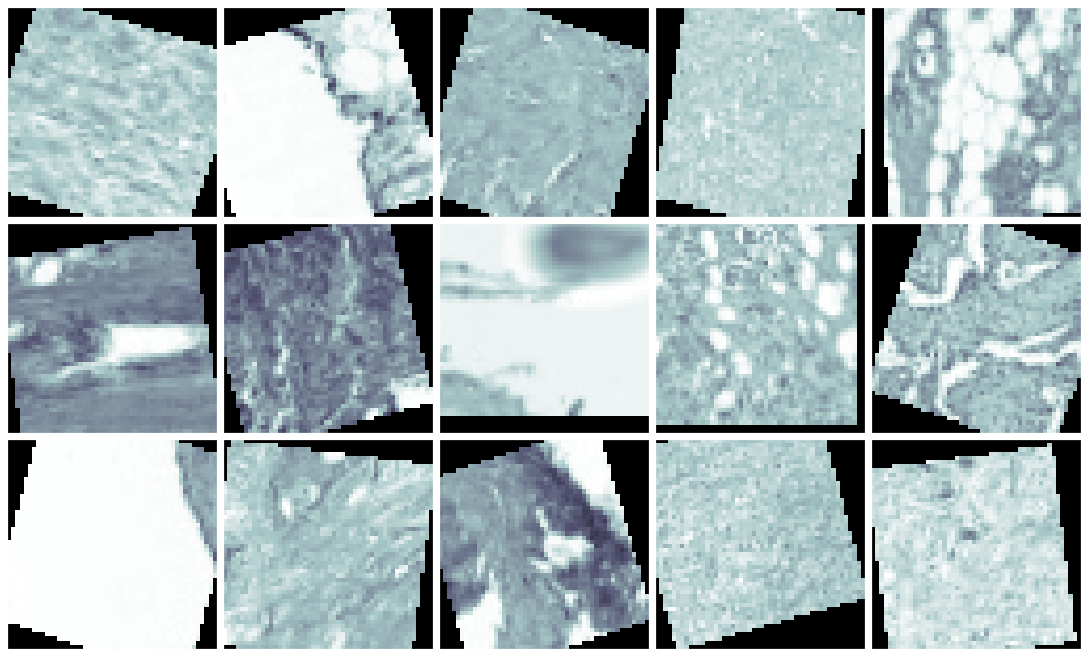

In [34]:
#get the first patch for visualization
images1, labels1 = train_generator1.next()

n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images1[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

In [35]:
train_data2=np.concatenate((train_data,train_data1))
train_label2=np.concatenate((train_label,train_label1))
print(train_data2.shape)
print(train_label2.shape)

(112000, 50, 50, 3)
(112000, 2)


In [36]:
train_label2_decode=np.argmax(train_label2,axis=1)
#j=0
#k=0
#for i in train_label2_decode:
#    if i==1:
#        j=j+1
#    if i==0:
#        k=k+1
#print("no. of 1", j)
#print("no. of 0", k)

In [37]:
train_data2, train_label2 = shuffle(train_data2, train_label2, random_state=0)

In [38]:
train_label2_decode=np.argmax(train_label2,axis=1)
#j=0
#k=0
#for i in train_label2_decode:
#    if i==1:
#        j=j+1
#    if i==0:
#        k=k+1
#print("no. of 1", j)
#print("no. of 0", k)

In [39]:
train_generator = train_datagen2.flow(train_data2,
                                     train_label2, 
                                     batch_size = 16, 
                                     shuffle = False)

100%|██████████| 3/3 [00:00<00:00, 221.71it/s]


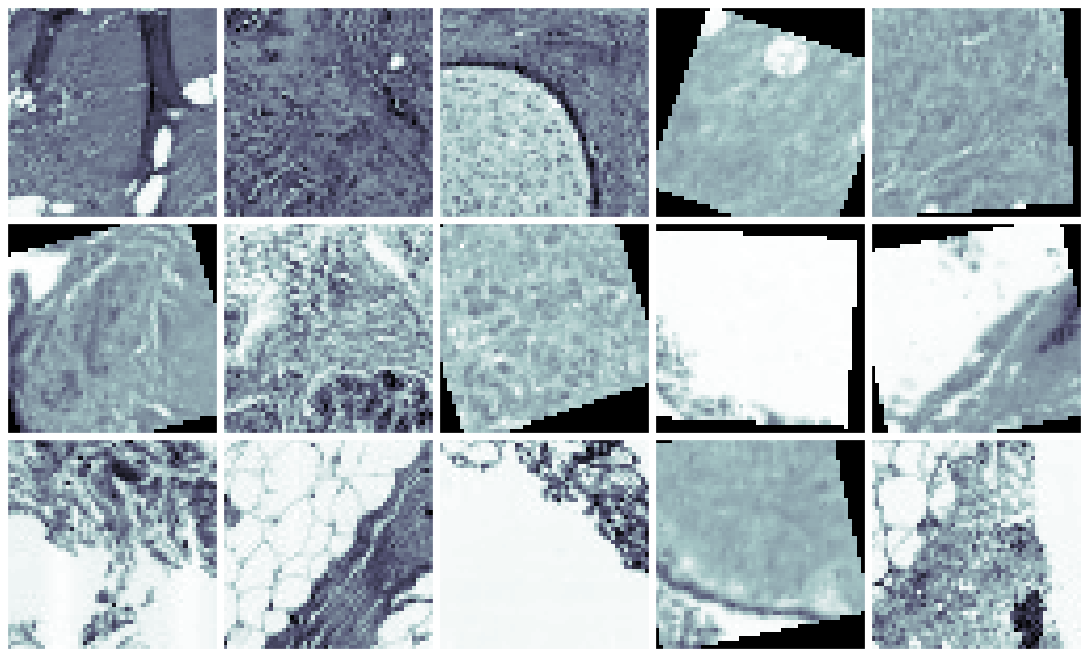

In [40]:
#get the first patch for visualization
images2, labels2 = train_generator.next()
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images2[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

In [41]:
#train_data2_2=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
train_label2_2=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(train_label2_2.shape)
#print(train_label2_2)
train_label2_2_decode=np.argmax(train_label2_2,axis=1)
#j=0
#k=0
#for i in train_label2_2_decode:
#    if i==1:
#        j=j+1
#    if i==0:
#        k=k+1
#print("no. of 1", j)
#print("no. of 0", k)

(112000, 2)


train_label1_decode=np.argmax(train_label1,axis=1)
j=0
k=0
for i in train_label1_decode:
    if i==1:
        j=j+1
    if i==0:
        k=k+1
print("no. of 1", j)
print("no. of 0", k)

train_label_decode=np.argmax(train_label,axis=1)
j=0
k=0
for i in train_label_decode:
    if i==1:
        j=j+1
    if i==0:
        k=k+1
print("no. of 1", j)
print("no. of 0", k)

# Callback

In [42]:
#os.mkdir('Model')


In [43]:
#os.mkdir('History')
def get_callbacks():
    
#    filepath = './Model/best_model_multiclass_128.hdf5'
    filepath = 'best_model_multiclass_128.h5'
    callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    #callback1 = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='min')
    callback2 = MyLogger(val_generator, 
                         y_test = np.argmax(test_label, axis = 1),
                         class_labels = ['idc-', 'idc+'])
    
    callback3 = CSVLogger('./History/Multiclass_Log_128.csv')

    return [callback1 ,callback2, callback3]

# Training

In [44]:
model = Network128(input_shape = (img_size, img_size, 3), nb_class = 2, depth = 5)
model.summary() 

2022-08-30 09:51:25.411917: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 09:51:25.560042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 09:51:25.560874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 09:51:25.569949: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 50, 50, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 25, 25, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

# Plotting Model

In [45]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, show_shapes=True)

2022-08-30 09:51:30.981223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-08-30 09:51:46.240610: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3500/3500 [==============================] - 451s 123ms/step - loss: 0.4884 - accuracy: 0.7824 - val_loss: 0.4478 - val_accuracy: 0.7956

Epoch 00001: val_accuracy improved from -inf to 0.79556, saving model to best_model_multiclass_128.h5
Predicting test data
450/450 [==============================] - 13s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:12.733196


---------------------
| Balanced Accuracy  |
---------------------

    0.7955555555555556


---------------------
|      Accuracy      |
---------------------

    0.7955555555555556


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.760401  0.863056  0.808483      3600
           1   0.841683  0.728056  0.780757      3600

    accuracy                       0.795556      7200
   macro avg   0.801042  0.795556  0.794620      7200
weighted avg   0.801042  0.795556  0.794620      7200

--------------------
| Confusion Matri

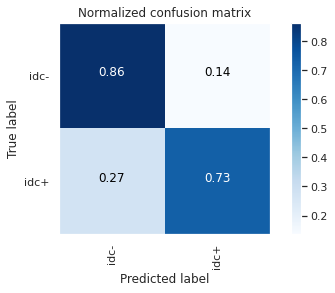

Epoch 2/30
3500/3500 [==============================] - 427s 122ms/step - loss: 0.4446 - accuracy: 0.8039 - val_loss: 0.5146 - val_accuracy: 0.7758

Epoch 00002: val_accuracy did not improve from 0.79556
Predicting test data
450/450 [==============================] - 10s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.769459


---------------------
| Balanced Accuracy  |
---------------------

    0.7758333333333334


---------------------
|      Accuracy      |
---------------------

    0.7758333333333334


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.731145  0.872500  0.795593      3600
           1   0.841942  0.679167  0.751845      3600

    accuracy                       0.775833      7200
   macro avg   0.786544  0.775833  0.773719      7200
weighted avg   0.786544  0.775833  0.773719      7200

--------------------
| Confusion Matrix |
--------------------

 [[3141  4

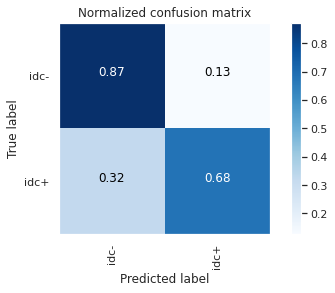

Epoch 3/30
3500/3500 [==============================] - 428s 122ms/step - loss: 0.4263 - accuracy: 0.8113 - val_loss: 0.4460 - val_accuracy: 0.8106

Epoch 00003: val_accuracy improved from 0.79556 to 0.81056, saving model to best_model_multiclass_128.h5
Predicting test data
450/450 [==============================] - 10s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.540583


---------------------
| Balanced Accuracy  |
---------------------

    0.8105555555555555


---------------------
|      Accuracy      |
---------------------

    0.8105555555555556


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.761949  0.903333  0.826640      3600
           1   0.881310  0.717778  0.791182      3600

    accuracy                       0.810556      7200
   macro avg   0.821630  0.810556  0.808911      7200
weighted avg   0.821630  0.810556  0.808911      7200

--------------------
| C

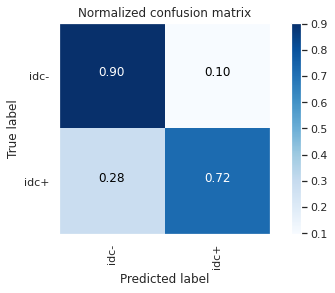

Epoch 4/30
3500/3500 [==============================] - 429s 122ms/step - loss: 0.4041 - accuracy: 0.8234 - val_loss: 0.4761 - val_accuracy: 0.8086

Epoch 00004: val_accuracy did not improve from 0.81056
Predicting test data
450/450 [==============================] - 10s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.904158


---------------------
| Balanced Accuracy  |
---------------------

    0.8086111111111112


---------------------
|      Accuracy      |
---------------------

    0.8086111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.908756  0.686111  0.781893      3600
           1   0.747880  0.931111  0.829498      3600

    accuracy                       0.808611      7200
   macro avg   0.828318  0.808611  0.805695      7200
weighted avg   0.828318  0.808611  0.805695      7200

--------------------
| Confusion Matrix |
--------------------

 [[2470 11

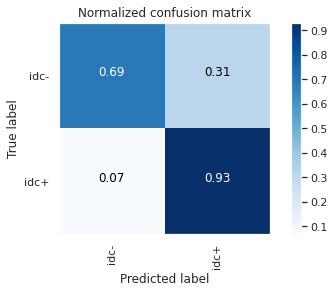

Epoch 5/30
3500/3500 [==============================] - 426s 122ms/step - loss: 0.3804 - accuracy: 0.8382 - val_loss: 1.2733 - val_accuracy: 0.6735

Epoch 00005: val_accuracy did not improve from 0.81056
Predicting test data
450/450 [==============================] - 10s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.231524


---------------------
| Balanced Accuracy  |
---------------------

    0.6734722222222222


---------------------
|      Accuracy      |
---------------------

    0.6734722222222222


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.609696  0.964167  0.747014      3600
           1   0.914399  0.382778  0.539651      3600

    accuracy                       0.673472      7200
   macro avg   0.762048  0.673472  0.643333      7200
weighted avg   0.762048  0.673472  0.643333      7200

--------------------
| Confusion Matrix |
--------------------

 [[3471  1

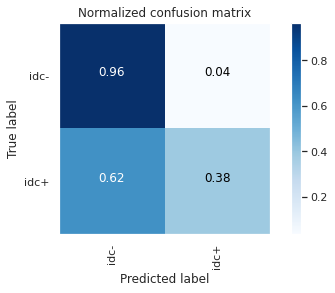

Epoch 6/30
3500/3500 [==============================] - 411s 118ms/step - loss: 0.3651 - accuracy: 0.8451 - val_loss: 0.4043 - val_accuracy: 0.8351

Epoch 00006: val_accuracy improved from 0.81056 to 0.83514, saving model to best_model_multiclass_128.h5
Predicting test data
450/450 [==============================] - 9s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.316183


---------------------
| Balanced Accuracy  |
---------------------

    0.8351388888888889


---------------------
|      Accuracy      |
---------------------

    0.8351388888888889


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.825465  0.850000  0.837553      3600
           1   0.845405  0.820278  0.832652      3600

    accuracy                       0.835139      7200
   macro avg   0.835435  0.835139  0.835102      7200
weighted avg   0.835435  0.835139  0.835102      7200

--------------------
| Co

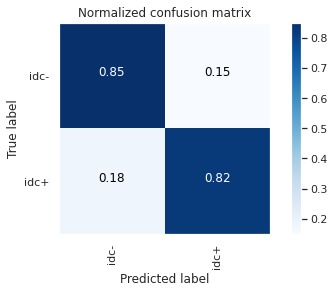

Epoch 7/30
3500/3500 [==============================] - 413s 118ms/step - loss: 0.3548 - accuracy: 0.8520 - val_loss: 0.7941 - val_accuracy: 0.6914

Epoch 00007: val_accuracy did not improve from 0.83514
Predicting test data
450/450 [==============================] - 10s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.276077


---------------------
| Balanced Accuracy  |
---------------------

    0.6913888888888888


---------------------
|      Accuracy      |
---------------------

    0.6913888888888889


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.624055  0.962778  0.757265      3600
           1   0.918591  0.420000  0.576439      3600

    accuracy                       0.691389      7200
   macro avg   0.771323  0.691389  0.666852      7200
weighted avg   0.771323  0.691389  0.666852      7200

--------------------
| Confusion Matrix |
--------------------

 [[3466  1

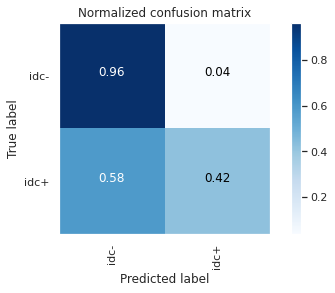

Epoch 8/30
3500/3500 [==============================] - 423s 121ms/step - loss: 0.3389 - accuracy: 0.8583 - val_loss: 0.3269 - val_accuracy: 0.8586

Epoch 00008: val_accuracy improved from 0.83514 to 0.85861, saving model to best_model_multiclass_128.h5
Predicting test data
450/450 [==============================] - 11s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.607621


---------------------
| Balanced Accuracy  |
---------------------

    0.8586111111111112


---------------------
|      Accuracy      |
---------------------

    0.8586111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.890502  0.817778  0.852592      3600
           1   0.831536  0.899444  0.864158      3600

    accuracy                       0.858611      7200
   macro avg   0.861019  0.858611  0.858375      7200
weighted avg   0.861019  0.858611  0.858375      7200

--------------------
| C

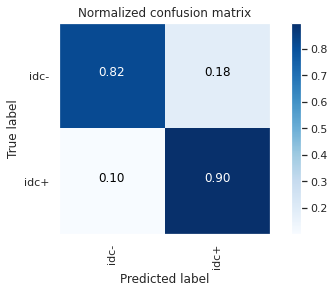

Epoch 9/30
3500/3500 [==============================] - 419s 120ms/step - loss: 0.3295 - accuracy: 0.8621 - val_loss: 0.3576 - val_accuracy: 0.8471

Epoch 00009: val_accuracy did not improve from 0.85861
Predicting test data
450/450 [==============================] - 10s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.290196


---------------------
| Balanced Accuracy  |
---------------------

    0.8470833333333333


---------------------
|      Accuracy      |
---------------------

    0.8470833333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.825306  0.880556  0.852036      3600
           1   0.871986  0.813611  0.841788      3600

    accuracy                       0.847083      7200
   macro avg   0.848646  0.847083  0.846912      7200
weighted avg   0.848646  0.847083  0.846912      7200

--------------------
| Confusion Matrix |
--------------------

 [[3170  4

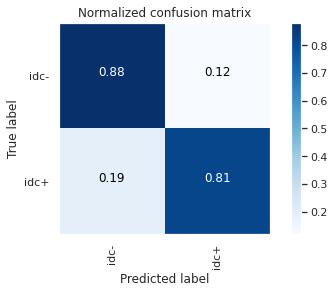

Epoch 10/30
3500/3500 [==============================] - 422s 121ms/step - loss: 0.3183 - accuracy: 0.8666 - val_loss: 0.6637 - val_accuracy: 0.7922

Epoch 00010: val_accuracy did not improve from 0.85861
Predicting test data
450/450 [==============================] - 10s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.436468


---------------------
| Balanced Accuracy  |
---------------------

    0.7922222222222222


---------------------
|      Accuracy      |
---------------------

    0.7922222222222223


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.729294  0.929444  0.817294      3600
           1   0.902757  0.655000  0.759176      3600

    accuracy                       0.792222      7200
   macro avg   0.816025  0.792222  0.788235      7200
weighted avg   0.816025  0.792222  0.788235      7200

--------------------
| Confusion Matrix |
--------------------

 [[3346  

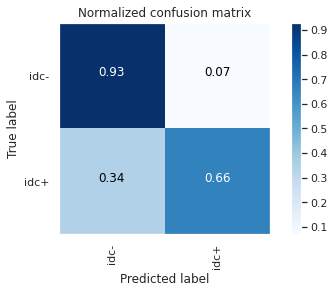

Epoch 11/30
3500/3500 [==============================] - 414s 118ms/step - loss: 0.3113 - accuracy: 0.8721 - val_loss: 0.4204 - val_accuracy: 0.8100

Epoch 00011: val_accuracy did not improve from 0.85861
Predicting test data
450/450 [==============================] - 9s 20ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.104707


---------------------
| Balanced Accuracy  |
---------------------

    0.81


---------------------
|      Accuracy      |
---------------------

    0.81


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.825175  0.786667  0.805461      3600
           1   0.796178  0.833333  0.814332      3600

    accuracy                       0.810000      7200
   macro avg   0.810677  0.810000  0.809896      7200
weighted avg   0.810677  0.810000  0.809896      7200

--------------------
| Confusion Matrix |
--------------------

 [[2832  768]
 [ 600 3000]]


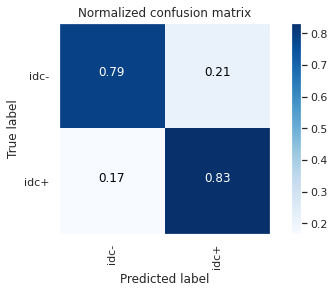

Epoch 12/30
3500/3500 [==============================] - 414s 118ms/step - loss: 0.3027 - accuracy: 0.8737 - val_loss: 0.3363 - val_accuracy: 0.8585

Epoch 00012: val_accuracy did not improve from 0.85861
Predicting test data
450/450 [==============================] - 10s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.267796


---------------------
| Balanced Accuracy  |
---------------------

    0.8584722222222223


---------------------
|      Accuracy      |
---------------------

    0.8584722222222222


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.848878  0.872222  0.860392      3600
           1   0.868609  0.844722  0.856499      3600

    accuracy                       0.858472      7200
   macro avg   0.858744  0.858472  0.858445      7200
weighted avg   0.858744  0.858472  0.858445      7200

--------------------
| Confusion Matrix |
--------------------

 [[3140  

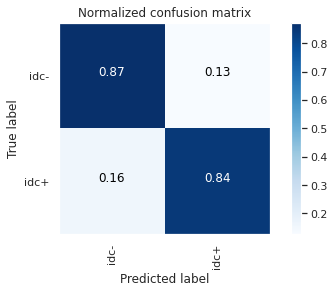

Epoch 13/30
3500/3500 [==============================] - 414s 118ms/step - loss: 0.2958 - accuracy: 0.8791 - val_loss: 0.4632 - val_accuracy: 0.8181

Epoch 00013: val_accuracy did not improve from 0.85861
Predicting test data
450/450 [==============================] - 10s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.359777


---------------------
| Balanced Accuracy  |
---------------------

    0.8180555555555555


---------------------
|      Accuracy      |
---------------------

    0.8180555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.796786  0.853889  0.824350      3600
           1   0.842609  0.782222  0.811294      3600

    accuracy                       0.818056      7200
   macro avg   0.819698  0.818056  0.817822      7200
weighted avg   0.819698  0.818056  0.817822      7200

--------------------
| Confusion Matrix |
--------------------

 [[3074  

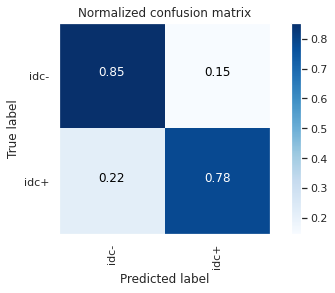

Epoch 14/30
3500/3500 [==============================] - 416s 119ms/step - loss: 0.2924 - accuracy: 0.8788 - val_loss: 0.3930 - val_accuracy: 0.8344

Epoch 00014: val_accuracy did not improve from 0.85861
Predicting test data
450/450 [==============================] - 10s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.509698


---------------------
| Balanced Accuracy  |
---------------------

    0.8344444444444444


---------------------
|      Accuracy      |
---------------------

    0.8344444444444444


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.785986  0.919167  0.847375      3600
           1   0.902676  0.749722  0.819120      3600

    accuracy                       0.834444      7200
   macro avg   0.844331  0.834444  0.833248      7200
weighted avg   0.844331  0.834444  0.833248      7200

--------------------
| Confusion Matrix |
--------------------

 [[3309  

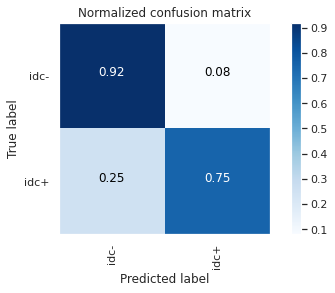

Epoch 15/30
3500/3500 [==============================] - 416s 119ms/step - loss: 0.2809 - accuracy: 0.8845 - val_loss: 0.3244 - val_accuracy: 0.8635

Epoch 00015: val_accuracy improved from 0.85861 to 0.86347, saving model to best_model_multiclass_128.h5
Predicting test data
450/450 [==============================] - 9s 20ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.164704


---------------------
| Balanced Accuracy  |
---------------------

    0.8634722222222222


---------------------
|      Accuracy      |
---------------------

    0.8634722222222222


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.879385  0.842500  0.860548      3600
           1   0.848840  0.884444  0.866277      3600

    accuracy                       0.863472      7200
   macro avg   0.864113  0.863472  0.863412      7200
weighted avg   0.864113  0.863472  0.863412      7200

--------------------
| C

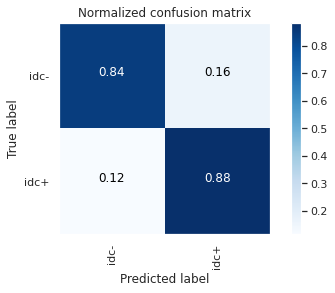

Epoch 16/30
3500/3500 [==============================] - 415s 119ms/step - loss: 0.2793 - accuracy: 0.8852 - val_loss: 0.3857 - val_accuracy: 0.8278

Epoch 00016: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 11s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.657339


---------------------
| Balanced Accuracy  |
---------------------

    0.8277777777777777


---------------------
|      Accuracy      |
---------------------

    0.8277777777777777


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.899188  0.738333  0.810860      3600
           1   0.778040  0.917222  0.841917      3600

    accuracy                       0.827778      7200
   macro avg   0.838614  0.827778  0.826389      7200
weighted avg   0.838614  0.827778  0.826389      7200

--------------------
| Confusion Matrix |
--------------------

 [[2658  

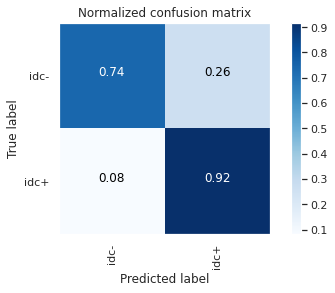

Epoch 17/30
3500/3500 [==============================] - 415s 119ms/step - loss: 0.2683 - accuracy: 0.8892 - val_loss: 0.3328 - val_accuracy: 0.8572

Epoch 00017: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 11s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:11.237893


---------------------
| Balanced Accuracy  |
---------------------

    0.8572222222222222


---------------------
|      Accuracy      |
---------------------

    0.8572222222222222


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.910077  0.792778  0.847387      3600
           1   0.816437  0.921667  0.865866      3600

    accuracy                       0.857222      7200
   macro avg   0.863257  0.857222  0.856627      7200
weighted avg   0.863257  0.857222  0.856627      7200

--------------------
| Confusion Matrix |
--------------------

 [[2854  

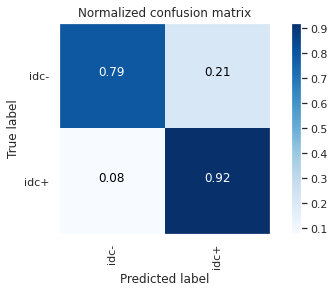

Epoch 18/30
3500/3500 [==============================] - 415s 119ms/step - loss: 0.2590 - accuracy: 0.8935 - val_loss: 0.4235 - val_accuracy: 0.8346

Epoch 00018: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 11s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:11.229528


---------------------
| Balanced Accuracy  |
---------------------

    0.8345833333333333


---------------------
|      Accuracy      |
---------------------

    0.8345833333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.794139  0.903333  0.845224      3600
           1   0.887923  0.765833  0.822371      3600

    accuracy                       0.834583      7200
   macro avg   0.841031  0.834583  0.833798      7200
weighted avg   0.841031  0.834583  0.833798      7200

--------------------
| Confusion Matrix |
--------------------

 [[3252  

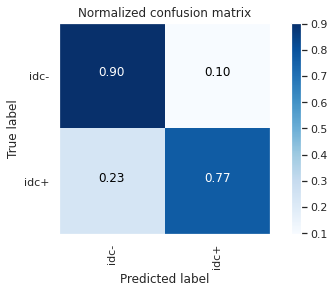

Epoch 19/30
3500/3500 [==============================] - 416s 119ms/step - loss: 0.2611 - accuracy: 0.8934 - val_loss: 0.3820 - val_accuracy: 0.8524

Epoch 00019: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 11s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:11.377926


---------------------
| Balanced Accuracy  |
---------------------

    0.8523611111111111


---------------------
|      Accuracy      |
---------------------

    0.8523611111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.821709  0.900000  0.859075      3600
           1   0.889469  0.804722  0.844976      3600

    accuracy                       0.852361      7200
   macro avg   0.855589  0.852361  0.852025      7200
weighted avg   0.855589  0.852361  0.852025      7200

--------------------
| Confusion Matrix |
--------------------

 [[3240  

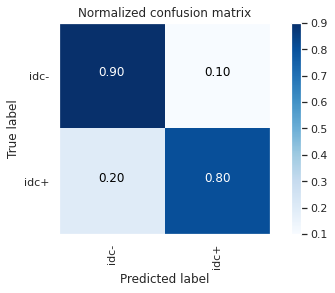

Epoch 20/30
3500/3500 [==============================] - 416s 119ms/step - loss: 0.2493 - accuracy: 0.8989 - val_loss: 0.3888 - val_accuracy: 0.8436

Epoch 00020: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 12s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:11.767539


---------------------
| Balanced Accuracy  |
---------------------

    0.8436111111111111


---------------------
|      Accuracy      |
---------------------

    0.8436111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.853833  0.829167  0.841319      3600
           1   0.833963  0.858056  0.845838      3600

    accuracy                       0.843611      7200
   macro avg   0.843898  0.843611  0.843578      7200
weighted avg   0.843898  0.843611  0.843578      7200

--------------------
| Confusion Matrix |
--------------------

 [[2985  

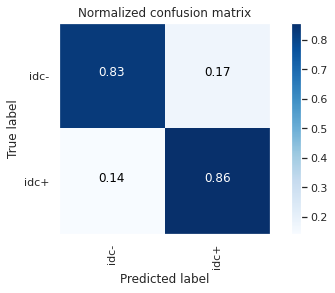

Epoch 21/30
3500/3500 [==============================] - 413s 118ms/step - loss: 0.2419 - accuracy: 0.9028 - val_loss: 0.3444 - val_accuracy: 0.8564

Epoch 00021: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 10s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.597635


---------------------
| Balanced Accuracy  |
---------------------

    0.8563888888888889


---------------------
|      Accuracy      |
---------------------

    0.8563888888888889


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.916558  0.784167  0.845210      3600
           1   0.811408  0.928611  0.866062      3600

    accuracy                       0.856389      7200
   macro avg   0.863983  0.856389  0.855636      7200
weighted avg   0.863983  0.856389  0.855636      7200

--------------------
| Confusion Matrix |
--------------------

 [[2823  

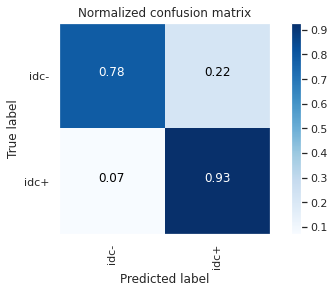

Epoch 22/30
3500/3500 [==============================] - 413s 118ms/step - loss: 0.2343 - accuracy: 0.9047 - val_loss: 0.3581 - val_accuracy: 0.8542

Epoch 00022: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 10s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:10.256669


---------------------
| Balanced Accuracy  |
---------------------

    0.8541666666666667


---------------------
|      Accuracy      |
---------------------

    0.8541666666666666


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.827091  0.895556  0.859963      3600
           1   0.886130  0.812778  0.847870      3600

    accuracy                       0.854167      7200
   macro avg   0.856610  0.854167  0.853916      7200
weighted avg   0.856610  0.854167  0.853916      7200

--------------------
| Confusion Matrix |
--------------------

 [[3224  

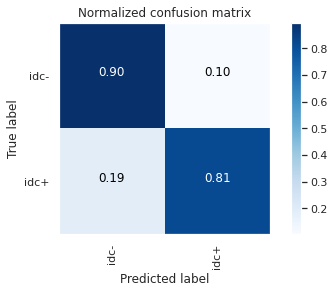

Epoch 23/30
3500/3500 [==============================] - 414s 118ms/step - loss: 0.2306 - accuracy: 0.9064 - val_loss: 0.4142 - val_accuracy: 0.8532

Epoch 00023: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 9s 20ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.153994


---------------------
| Balanced Accuracy  |
---------------------

    0.8531944444444444


---------------------
|      Accuracy      |
---------------------

    0.8531944444444445


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.872983  0.826667  0.849194      3600
           1   0.835400  0.879722  0.856988      3600

    accuracy                       0.853194      7200
   macro avg   0.854191  0.853194  0.853091      7200
weighted avg   0.854191  0.853194  0.853091      7200

--------------------
| Confusion Matrix |
--------------------

 [[2976  6

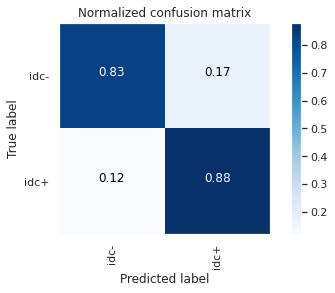

Epoch 24/30
3500/3500 [==============================] - 415s 119ms/step - loss: 0.2201 - accuracy: 0.9101 - val_loss: 0.4826 - val_accuracy: 0.8096

Epoch 00024: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 11s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:11.233299


---------------------
| Balanced Accuracy  |
---------------------

    0.8095833333333333


---------------------
|      Accuracy      |
---------------------

    0.8095833333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.767587  0.888056  0.823439      3600
           1   0.867216  0.731111  0.793369      3600

    accuracy                       0.809583      7200
   macro avg   0.817401  0.809583  0.808404      7200
weighted avg   0.817401  0.809583  0.808404      7200

--------------------
| Confusion Matrix |
--------------------

 [[3197  

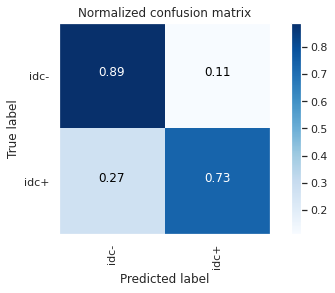

Epoch 25/30
3500/3500 [==============================] - 416s 119ms/step - loss: 0.2186 - accuracy: 0.9115 - val_loss: 0.4353 - val_accuracy: 0.8289

Epoch 00025: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 9s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.321009


---------------------
| Balanced Accuracy  |
---------------------

    0.8288888888888889


---------------------
|      Accuracy      |
---------------------

    0.8288888888888889


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.798688  0.879444  0.837123      3600
           1   0.865884  0.778333  0.819778      3600

    accuracy                       0.828889      7200
   macro avg   0.832286  0.828889  0.828450      7200
weighted avg   0.832286  0.828889  0.828450      7200

--------------------
| Confusion Matrix |
--------------------

 [[3166  4

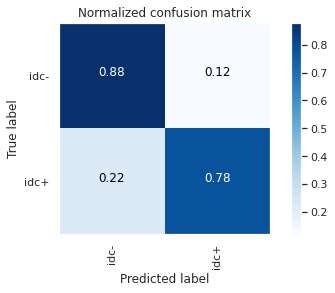

Epoch 26/30
3500/3500 [==============================] - 418s 120ms/step - loss: 0.2116 - accuracy: 0.9151 - val_loss: 0.4059 - val_accuracy: 0.8568

Epoch 00026: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 10s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.630636


---------------------
| Balanced Accuracy  |
---------------------

    0.8568055555555556


---------------------
|      Accuracy      |
---------------------

    0.8568055555555556


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.840807  0.880278  0.860090      3600
           1   0.874381  0.833333  0.853364      3600

    accuracy                       0.856806      7200
   macro avg   0.857594  0.856806  0.856727      7200
weighted avg   0.857594  0.856806  0.856727      7200

--------------------
| Confusion Matrix |
--------------------

 [[3169  

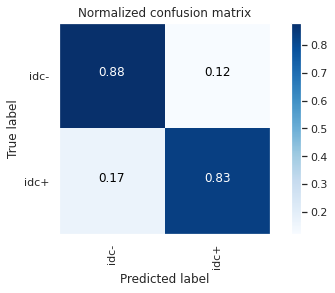

Epoch 27/30
3500/3500 [==============================] - 417s 119ms/step - loss: 0.2012 - accuracy: 0.9196 - val_loss: 0.4692 - val_accuracy: 0.8326

Epoch 00027: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 11s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:11.494933


---------------------
| Balanced Accuracy  |
---------------------

    0.8326388888888889


---------------------
|      Accuracy      |
---------------------

    0.8326388888888889


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.792859  0.900556  0.843283      3600
           1   0.884924  0.764722  0.820444      3600

    accuracy                       0.832639      7200
   macro avg   0.838892  0.832639  0.831863      7200
weighted avg   0.838892  0.832639  0.831863      7200

--------------------
| Confusion Matrix |
--------------------

 [[3242  

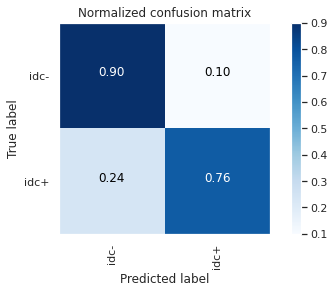

Epoch 28/30
3500/3500 [==============================] - 415s 119ms/step - loss: 0.1973 - accuracy: 0.9205 - val_loss: 0.4262 - val_accuracy: 0.8431

Epoch 00028: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 9s 20ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.273455


---------------------
| Balanced Accuracy  |
---------------------

    0.8430555555555556


---------------------
|      Accuracy      |
---------------------

    0.8430555555555556


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.829861  0.863056  0.846133      3600
           1   0.857350  0.823056  0.839853      3600

    accuracy                       0.843056      7200
   macro avg   0.843605  0.843056  0.842993      7200
weighted avg   0.843605  0.843056  0.842993      7200

--------------------
| Confusion Matrix |
--------------------

 [[3107  4

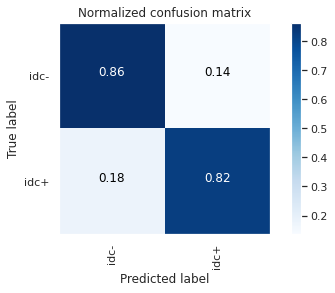

Epoch 29/30
3500/3500 [==============================] - 415s 118ms/step - loss: 0.1880 - accuracy: 0.9255 - val_loss: 0.5837 - val_accuracy: 0.7733

Epoch 00029: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 9s 20ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.286481


---------------------
| Balanced Accuracy  |
---------------------

    0.7733333333333333


---------------------
|      Accuracy      |
---------------------

    0.7733333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.739300  0.844444  0.788382      3600
           1   0.818653  0.702222  0.755981      3600

    accuracy                       0.773333      7200
   macro avg   0.778976  0.773333  0.772181      7200
weighted avg   0.778976  0.773333  0.772181      7200

--------------------
| Confusion Matrix |
--------------------

 [[3040  5

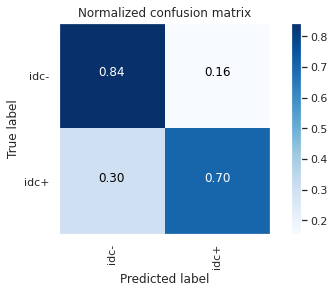

Epoch 30/30
3500/3500 [==============================] - 415s 119ms/step - loss: 0.1801 - accuracy: 0.9273 - val_loss: 0.3657 - val_accuracy: 0.8506

Epoch 00030: val_accuracy did not improve from 0.86347
Predicting test data
450/450 [==============================] - 9s 20ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:09.154486


---------------------
| Balanced Accuracy  |
---------------------

    0.8505555555555555


---------------------
|      Accuracy      |
---------------------

    0.8505555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.877618  0.814722  0.845001      3600
           1   0.827112  0.886389  0.855725      3600

    accuracy                       0.850556      7200
   macro avg   0.852365  0.850556  0.850363      7200
weighted avg   0.852365  0.850556  0.850363      7200

--------------------
| Confusion Matrix |
--------------------

 [[2933  6

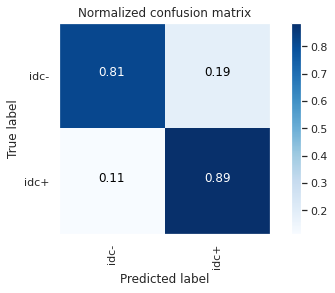

In [46]:
'''
#using augmentation data
history = model.fit_generator(train_generator, 
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              class_weight =class_weights,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )
#using raw data
history = model.fit_generator(train_data_label, 
                              steps_per_epoch = epoch_step,
                              validation_data=train_val_data,
                              epochs = 70,
                              validation_steps= val_step, 
                              class_weight =class_weights,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )


epoch_step = (len(train_data) // 16)
print(epoch_step)
val_step=len(test_data)// 16
print(val_step)
train_val_data=(test_data, test_label)
#print(train_generator.shape)
train_data_label=(train_data,train_label)
#print(val_generator.shape)
#(self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, validation_freq, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch)

history = model.fit_generator( 
                        train_datagen.flow(train_data,train_label),
                        steps_per_epoch=epoch_step,
                        epochs = 70,
                        verbose = 1,
                        callbacks = get_callbacks(),
                        validation_data=(test_data,test_label),
                        validation_steps = val_step,
                        class_weight =weights
                        )

'''

history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              epochs = epoch_4_test,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )

# Loading Best Model

In [47]:
from keras.models import load_model
model1 = load_model('./best_model_multiclass_128.h5', compile=False)

# Best Model Performance
def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):

analyse of best model
VAL kappa
0.7173809523809525
analyse 1st model
report of val data
              precision    recall  f1-score   support

           0   0.871700  0.841190  0.856174      8400
           1   0.846561  0.876190  0.861121      8400

    accuracy                       0.858690     16800
   macro avg   0.859130  0.858690  0.858647     16800
weighted avg   0.859130  0.858690  0.858647     16800



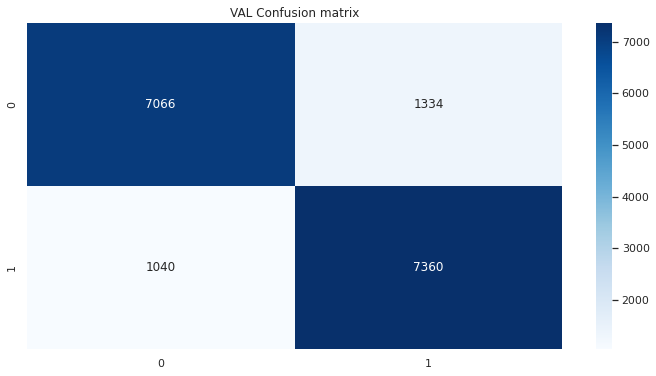

In [48]:
import sklearn
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
#---------------
from keras.models import load_model

#model1 = load_model('./best_model_multiclass_128.h5', compile=False)
print("analyse of best model")


cf_matrix_val = confusion_matrix(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_val, annot=True, cmap='Blues', fmt='g')
plt.title("VAL Confusion matrix")
# kappa VAL
kappa_val = cohen_kappa_score(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)
print("VAL kappa")
print(kappa_val)



print("analyse 1st model")
print("report of val data")
report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) , digits=6
)
print(report)

report of test data
              precision    recall  f1-score   support

           0  0.8793853 0.8425000 0.8605476      3600
           1  0.8488403 0.8844444 0.8662767      3600

    accuracy                      0.8634722      7200
   macro avg  0.8641128 0.8634722 0.8634121      7200
weighted avg  0.8641128 0.8634722 0.8634121      7200

TEST kappa
0.7269444444444444


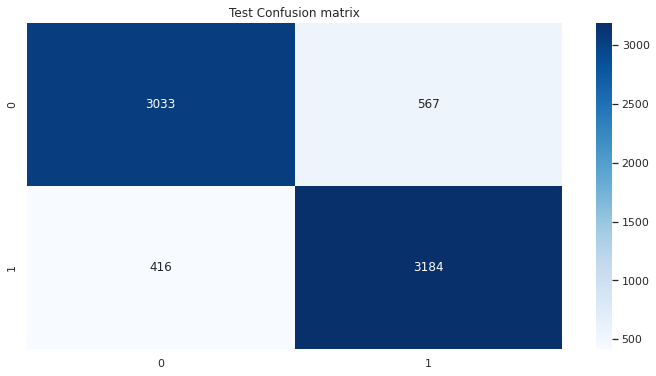

In [49]:
#------------------
cf_matrix_test = confusion_matrix(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title("Test Confusion matrix")



print("report of test data")
import sklearn

report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) , digits=7
)
print(report)


# kappa TEST
kappa_test = cohen_kappa_score(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1)
)
print("TEST kappa")
print(kappa_test)

roc analysis of test dataset


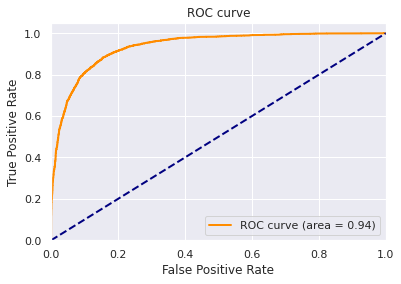

auc value
0.9354618827160495


In [50]:
print("roc analysis of test dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

roc analysis of validation dataset


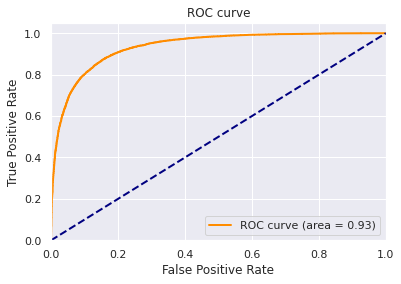

auc value
0.9345185303287983


In [51]:
print("roc analysis of validation dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val2_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

1050/1050 [==============================] - 22s 21ms/step
validation auc
0.8586904761904762
validation roc


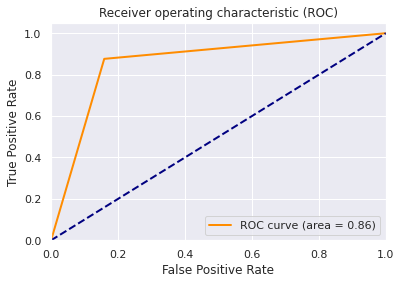

In [52]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras= model1.predict_generator(val2_generator,verbose=1)
#.ravel()
y_pred_keras=np.argmax(y_pred_keras,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

val_label2=np.argmax(val_label, axis=1)
#print(test_label2)
#print(len(test_label2))

#fpr_keras, tpr_keras, thresholds_keras = roc_curve(val_label2, y_pred_keras)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(val_label2, y_pred_keras
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("validation auc")
print(roc_auc)

print("validation roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

450/450 [==============================] - 9s 20ms/step
test auc
0.8634722222222223
test roc


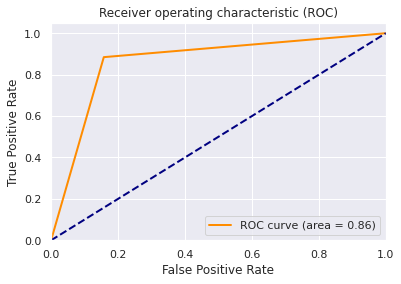

In [53]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras2= model1.predict_generator(val_generator,verbose=1)
#.ravel()
y_pred_keras2=np.argmax(y_pred_keras2,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

test_label2=np.argmax(test_label, axis=1)
#print(test_label2)
#print(len(test_label2))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label2, y_pred_keras2)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(test_label2, y_pred_keras2
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("test auc")
print(roc_auc)
print("test roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [54]:
'''

#must use train_label1 as train_label went through a shuffle in image-data-generator
test_final_model(best_model, train_generator, 
               val_generator, val2_generator, 
               np.argmax(train_label2_2, axis=1),
               np.argmax(test_label, axis=1),
               np.argmax(val_label, axis=1), 
               class_labels = ['idc-', 'idc+'])
               '''

"\n\n#must use train_label1 as train_label went through a shuffle in image-data-generator\ntest_final_model(best_model, train_generator, \n               val_generator, val2_generator, \n               np.argmax(train_label2_2, axis=1),\n               np.argmax(test_label, axis=1),\n               np.argmax(val_label, axis=1), \n               class_labels = ['idc-', 'idc+'])\n               "

# Plotting EpochPlot

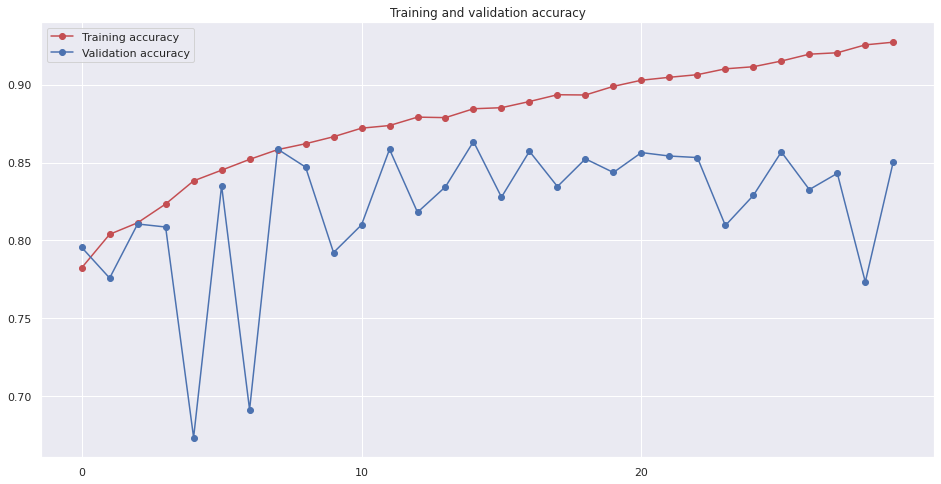

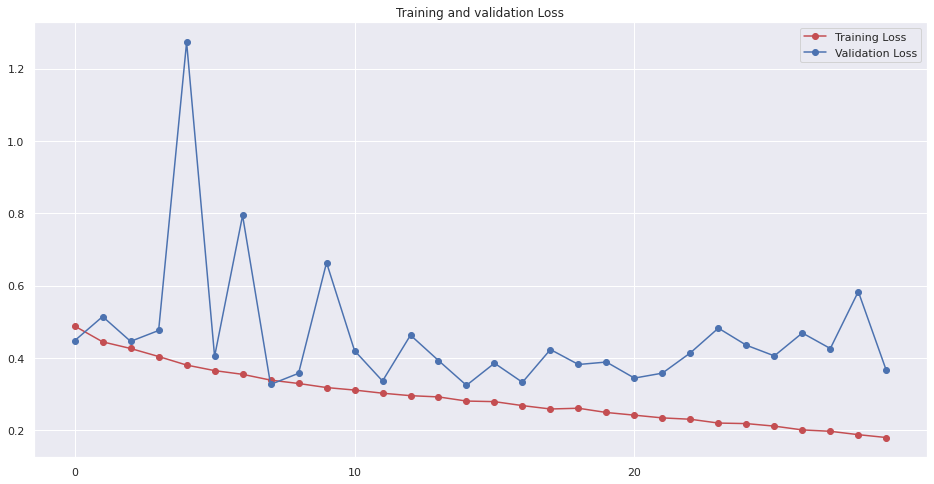

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()


In [56]:
#print(y_test)

from sklearn.cross_validation import train_test_split# Grad-CAM and Saliency Map 
coming soon....